In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
tags = pd.read_csv('../goodbooks-10k/tags.csv')
tag_counts = pd.read_csv('../goodbooks-10k/book_tags.csv')
books = pd.read_csv('../goodbooks-10k/books.csv')
ratings = pd.read_csv('../goodbooks-10k/ratings.csv')
to_read = pd.read_csv('../goodbooks-10k/to_read.csv')

In [3]:
tags.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


In [4]:
tag_counts.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [5]:
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [6]:
ratings.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [7]:
to_read.head()

,user_id,book_id
0,1,112
1,1,235
2,1,533
3,1,1198
4,1,1874


In [8]:
year_groups = books.groupby('original_publication_year')
year_groups

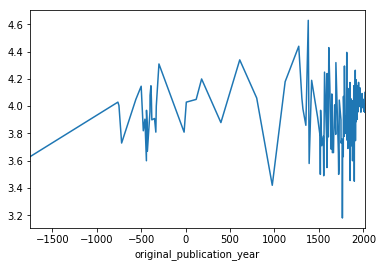

In [9]:
average_rating_over_time = year_groups.average_rating.mean()
average_rating_over_time.plot()

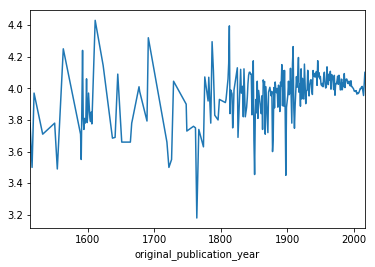

In [10]:
average_rating_over_time_1500 = average_rating_over_time.where(average_rating_over_time.keys() > 1500).dropna()
average_rating_over_time_1500.plot()

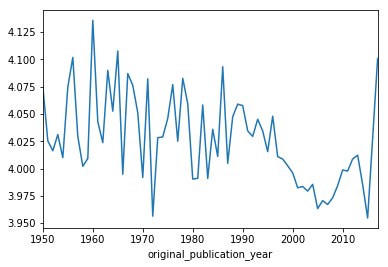

In [11]:
average_rating_over_time_1950 = average_rating_over_time.where(average_rating_over_time.keys() >= 1950).dropna()
average_rating_over_time_1950.plot()

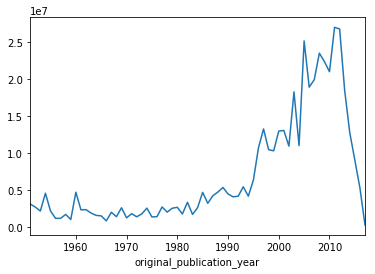

In [12]:
# is volatility due to how many people have actually rated?
# there are probably more ratings in recent times.
reading_over_time = year_groups.ratings_count.sum()
reading_over_time_1950 = reading_over_time.where(reading_over_time.keys() > 1950).dropna()
reading_over_time_1950.plot()

In [13]:
tags.shape, tag_counts.shape

((34252, 2), (999912, 3))

In [14]:
# what are the most popular tags? 
tag_data = pd.merge(tags, tag_counts, on='tag_id').groupby('tag_id').sum()
tag_data.drop(['goodreads_book_id'], axis=1, inplace=True)
tag_data = pd.merge(tag_data, tags, left_index=True, right_on='tag_id')
sorted_tag_data = tag_data.sort_values(['count'], ascending=False)

# people are aspirational by 2 orders of magnitude more than they are productive
sorted_tag_data.head(10)

,count,tag_id,tag_name
30574,140718761,30574,to-read
8717,7507958,8717,currently-reading
11557,4503173,11557,favorites
11743,3688819,11743,fiction
11305,3548157,11305,fantasy
33114,1848306,33114,young-adult
7457,1756920,7457,classics
5207,1317235,5207,books-i-own
26138,1231926,26138,romance
22743,1224279,22743,owned


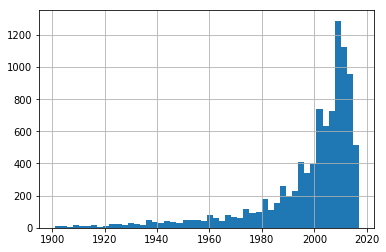

In [15]:
# published books over time (after 1900)
books[books.original_publication_year > 1900].original_publication_year.hist(bins=50)

In [16]:
# average rating of each of the top categories?
tag_names = tag_counts.copy()
tag_names['book_id'] = tag_names.goodreads_book_id
tag_names = pd.merge(tag_names, tags, on='tag_id')
tag_names.drop(['goodreads_book_id', 'tag_id'], axis=1, inplace=True)
tag_names.head()

,count,book_id,tag_name
0,167697,1,to-read
1,24549,2,to-read
2,496107,3,to-read
3,11909,5,to-read
4,298,6,to-read


In [17]:
ratings = pd.DataFrame(columns=['book_id', 'average_rating'])
ratings.book_id = books.book_id
ratings.average_rating = books.average_rating

# count is the tag count
tags_with_ratings = pd.merge(tag_names, ratings, on='book_id')
tags_with_ratings.drop(['count', 'book_id'], axis=1, inplace=True)

## Most popular tag based on number of books, not number of tags
popular_tags_based_on_books = tags_with_ratings.groupby('tag_name').count().sort_values(['average_rating'], ascending=False)
popular_tags_based_on_books

,average_rating
tag_name,
to-read,9983
favorites,9881
owned,9858
books-i-own,9799
currently-reading,9776
library,9415
owned-books,9221
fiction,9097
to-buy,8692


In [18]:
# average rating of most popular categories?
top_500_categories = popular_tags_based_on_books.head(500).index
top_500_categories

Index(['to-read', 'favorites', 'owned', 'books-i-own', 'currently-reading',
       'library', 'owned-books', 'fiction', 'to-buy', 'kindle',
       ...
       'nonfic', 'autobiography-memoir', 'space', 'award-winners',
       'partially-read', '1001-to-read', 'werewolves', 'read-as-a-child',
       'faith', 'guilty-pleasure'],
      dtype='object', name='tag_name', length=500)

In [19]:
top_500_tags_ratings = tags_with_ratings[tags_with_ratings.tag_name.isin(top_500_categories)]
sorted_top_rated_tags = top_500_tags_ratings.groupby(['tag_name']).mean().sort_values(['average_rating'], ascending=False)

In [20]:
sorted_top_rated_tags.head(10)

,average_rating
tag_name,
5-star,4.269784
comics-manga,4.245169
picture-books,4.221658
comic-books,4.220400
comics-graphic-novels,4.218390
comics-and-graphic-novels,4.217915
graphic-novels-and-comics,4.217685
comic,4.214871
graphic-novels-comics,4.214269


In [21]:
sorted_top_rated_tags.tail(10)

,average_rating
tag_name,
chic-lit,3.807898
chicklit,3.794334
read-in-2008,3.789487
stopped-reading,3.789331
gave-up-on,3.781078
womens-fiction,3.776495
women-s-fiction,3.769772
couldn-t-finish,3.750403
gave-up,3.730121


In [22]:
user_ratings = pd.read_csv('../goodbooks-10k/ratings.csv')
user_ratings_and_books = pd.merge(user_ratings, books, on='book_id')
user_network_data = pd.DataFrame(columns=['book', 'user_id', 'rating'])
user_network_data.book = user_ratings_and_books.original_title
user_network_data.user_id = user_ratings_and_books.user_id
user_network_data.rating = user_ratings_and_books.rating

In [23]:
# this sample isn't the most accurate representation of what's on the goodreads website
# for ex: still life has 4.04 from 60k ratings but a 4.78 on here with 100 ratings
sorted_books = user_network_data.groupby('book').mean().sort_values(['rating'], ascending=False)
sorted_books.head()

,user_id,rating
book,,
Still Life with Woodpecker,16439.313131,4.777778
The Beautiful and Damned,27160.370000,4.660000
Villa Incognito,29339.969072,4.618557
Peter and the Shadow Thieves,30165.500000,4.557143
The Taste of Home Cookbook,25043.130000,4.550000


In [24]:
sorted_books.tail()

,user_id,rating
book,,
The Woman in White,22867.17,2.88
The Chamber,16083.36,2.88
The Pearls of Lutra,22194.70,2.80
The Fellowship of the Ring,30932.33,2.77
Nine Stories,16445.05,2.53


In [25]:
def check(book):
    return user_network_data[user_network_data.book == book].rating.mean()

In [26]:
check("A Supposedly Fun Thing I'll Never Do Again: Essays and Arguments")

3.3

In [27]:
check("Harry Potter and the Half-Blood Prince")

4.24

In [28]:
user_network_data.shape

(79701, 3)

In [29]:
user_network_data.head()

,book,user_id,rating
0,Harry Potter and the Half-Blood Prince,314,5
1,Harry Potter and the Half-Blood Prince,439,3
2,Harry Potter and the Half-Blood Prince,588,5
3,Harry Potter and the Half-Blood Prince,1169,4
4,Harry Potter and the Half-Blood Prince,1185,4


In [30]:
user_network_data.to_json('user_network_data.json')

In [31]:
# Network based on tags shared between books
book_tags = pd.read_csv('../goodbooks-10k/book_tags.csv')
book_tags['book_id'] = book_tags.goodreads_book_id
books_with_tags = pd.merge(pd.merge(book_tags, books, on='book_id'), tags, on='tag_id')

books_with_tags.shape, books.shape, book_tags.shape

((999912, 27), (10000, 23), (999912, 4))

In [32]:
tag_network_data = books_with_tags[['original_title', 'tag_name', 'count']]
tag_network_data.columns = ['title', 'tag', 'tag_count']
tag_network_data = tag_network_data.dropna()
tag_network_data.shape

tag_network_data.to_json('tag_network_data.json')

In [33]:
# to read vs. read scatter plot
read_books = books[['book_id', 'original_publication_year', 'average_rating', 'ratings_count', 'original_title']]
unread_counts = to_read.groupby('book_id').count()
unread_counts.columns = ['unread_count']
unread_counts.head()

,unread_count
book_id,
1,973
2,400
3,287
4,1478
5,1293


In [34]:
def check_grouping(book_id):
    return to_read[to_read.book_id == book_id].shape[0]

In [35]:
check_grouping(1), check_grouping(2), check_grouping(3), check_grouping(4), check_grouping(5)

(973, 400, 287, 1478, 1293)

In [36]:
# NOTE: user can give a rating even if they haven't read it, so can't compare ratings_count with unread_count

unread_counts.head()

,unread_count
book_id,
1,973
2,400
3,287
4,1478
5,1293


In [37]:
read_books.sort_values('book_id').head()

,book_id,original_publication_year,average_rating,ratings_count,original_title
26,1,2005.0,4.54,1678823,Harry Potter and the Half-Blood Prince
20,2,2003.0,4.46,1735368,Harry Potter and the Order of the Phoenix
1,3,1997.0,4.44,4602479,Harry Potter and the Philosopher's Stone
17,5,1999.0,4.53,1832823,Harry Potter and the Prisoner of Azkaban
23,6,2000.0,4.53,1753043,Harry Potter and the Goblet of Fire


In [38]:
# This gives us top 40
dropped_categories = [
    'to-read',
    'currently-reading',
    'favorites',
    'books-i-own',
    'owned',
    'favourites',
    'owned-books',
    'default',
    'to-buy',
    'my-books',
]

tag_names = sorted_tag_data.head(50).where(~sorted_tag_data.tag_name.isin(dropped_categories)).dropna().drop('count', axis=1)
categories = tag_names.tag_name

top_40_book_tags = book_tags[book_tags.tag_id.isin(tag_names.tag_id)]
top_40_book_tags.shape, book_tags.shape

((144463, 4), (999912, 4))

In [39]:
top_40_book_tags_with_year = pd.merge(top_40_book_tags, books[['book_id', 'original_title', 'original_publication_year', 'average_rating']], on='book_id')
top_40_book_tags_with_year.head()

,goodreads_book_id,tag_id,count,book_id,original_title,original_publication_year,average_rating
0,1,11305,37174,1,Harry Potter and the Half-Blood Prince,2005.0,4.54
1,1,33114,12716,1,Harry Potter and the Half-Blood Prince,2005.0,4.54
2,1,11743,9954,1,Harry Potter and the Half-Blood Prince,2005.0,4.54
3,1,32989,4364,1,Harry Potter and the Half-Blood Prince,2005.0,4.54
4,1,27199,3857,1,Harry Potter and the Half-Blood Prince,2005.0,4.54


In [40]:
# popularity of category across time (over time referring to book publishing date, not rating date)
# i.e., evolution of categories written about over time
top_40_tag_books = pd.merge(top_40_book_tags_with_year, tag_names, on='tag_id')
top_40_tag_books.head()

,goodreads_book_id,tag_id,count,book_id,original_title,original_publication_year,average_rating,tag_name
0,1,11305,37174,1,Harry Potter and the Half-Blood Prince,2005.0,4.54,fantasy
1,2,11305,3441,2,Harry Potter and the Order of the Phoenix,2003.0,4.46,fantasy
2,3,11305,47478,3,Harry Potter and the Philosopher's Stone,1997.0,4.44,fantasy
3,5,11305,39330,5,Harry Potter and the Prisoner of Azkaban,1999.0,4.53,fantasy
4,6,11305,38378,6,Harry Potter and the Goblet of Fire,2000.0,4.53,fantasy


In [41]:
def category_across_time(category):
    filtered = top_40_tag_books[top_40_tag_books.tag_name == category][top_40_tag_books.original_publication_year > 1900]
    rating_over_time = filtered.groupby('original_publication_year').average_rating.mean()
    count_over_time_grouped = filtered.groupby('original_publication_year').count()
    count_over_time = pd.DataFrame(columns=['year', 'frequency'])
    count_over_time.frequency = count_over_time_grouped['count']
    count_over_time.year = count_over_time_grouped.index
    return rating_over_time, count_over_time

fantasy_ratings, fantasy_counts = category_across_time('fantasy')

/Users/nicholas.watts/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


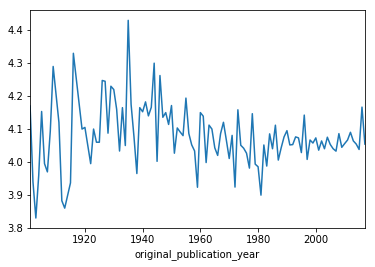

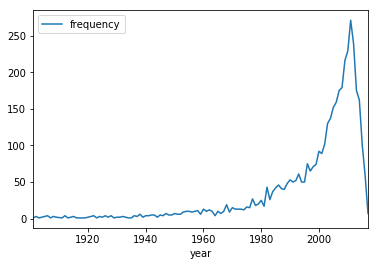

In [42]:
fantasy_ratings.plot()
fantasy_counts.plot('year', 'frequency')

/Users/nicholas.watts/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


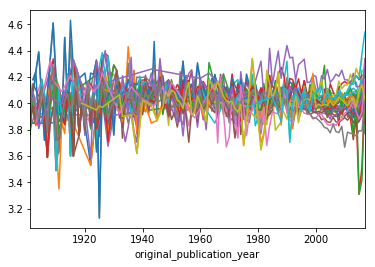

In [43]:
# Plot all genre ratings over time
plt.figure()
for category in categories:
    rating_plot, _ = category_across_time(category)
    rating_plot.plot()

/Users/nicholas.watts/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/nicholas.watts/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


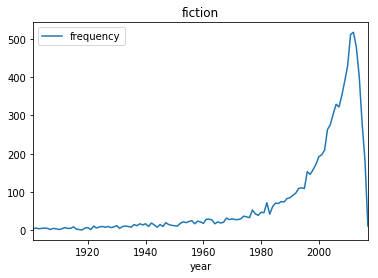

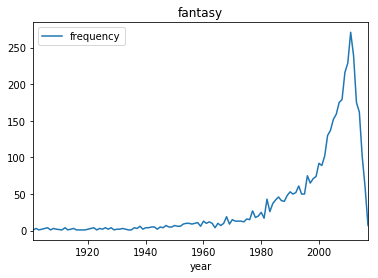

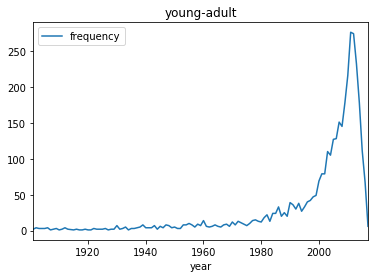

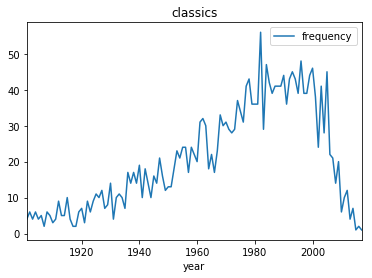

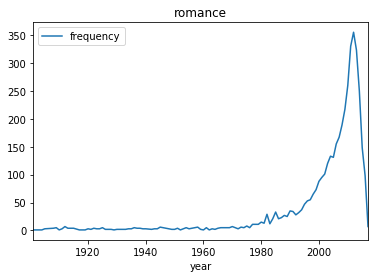

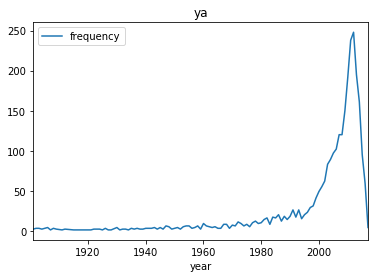

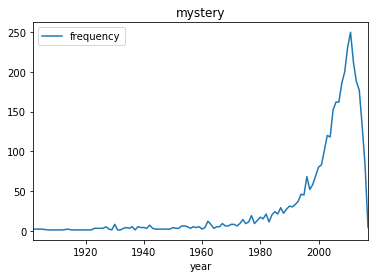

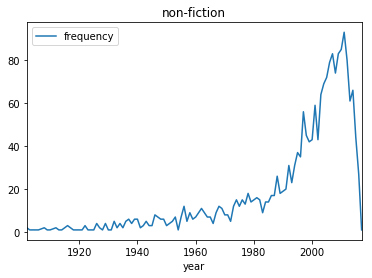

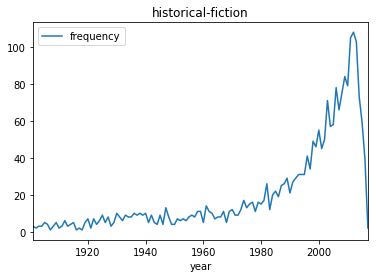

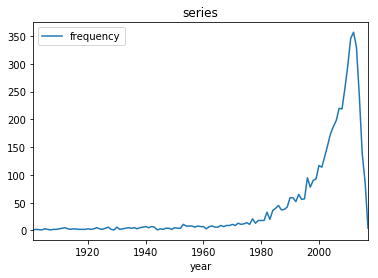

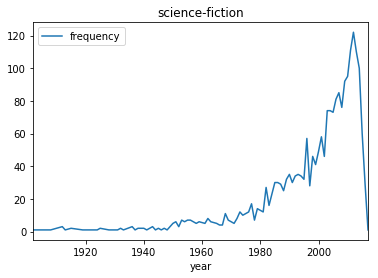

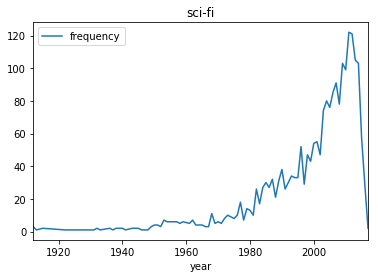

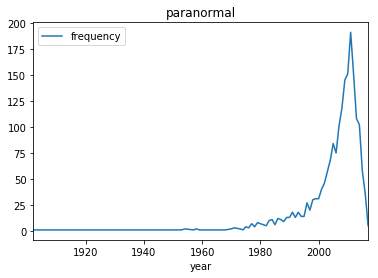

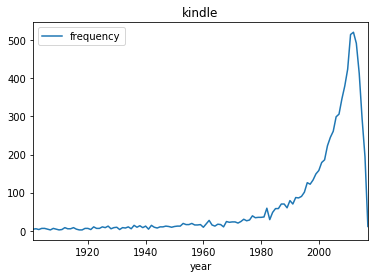

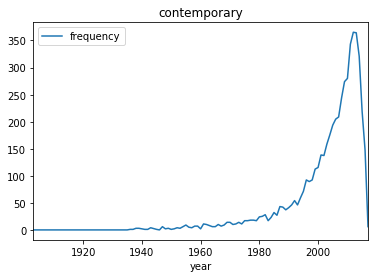

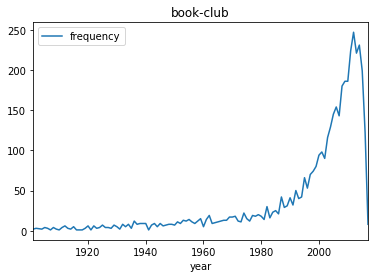

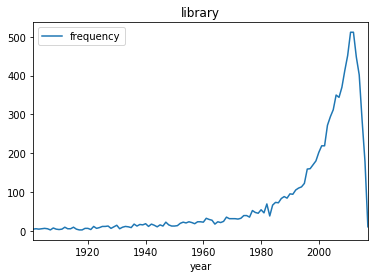

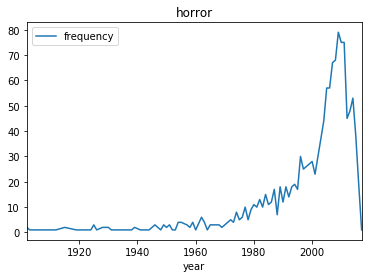

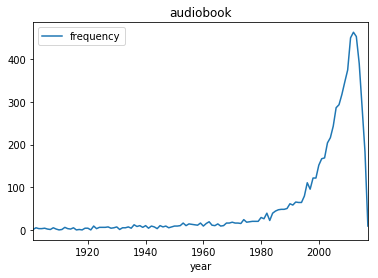

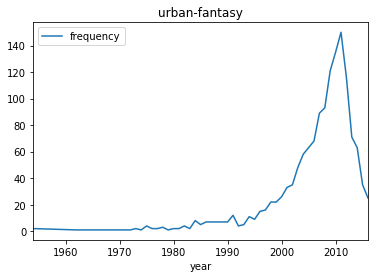

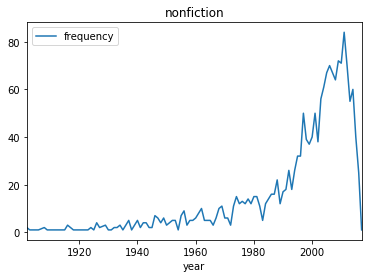

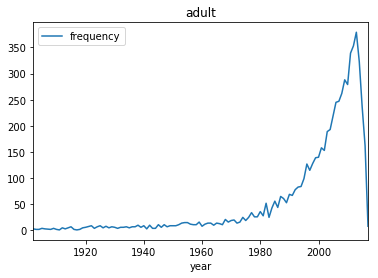

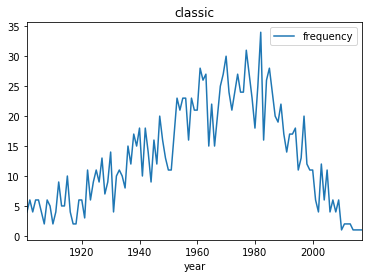

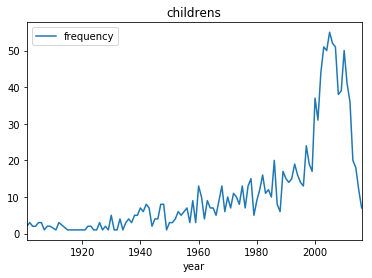

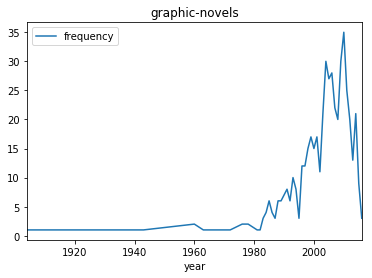

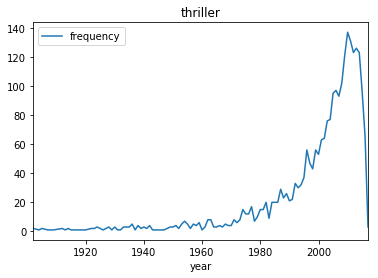

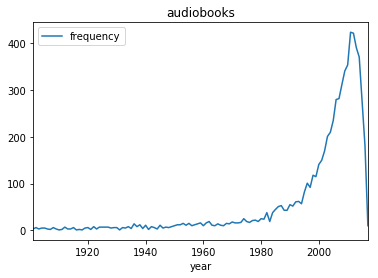

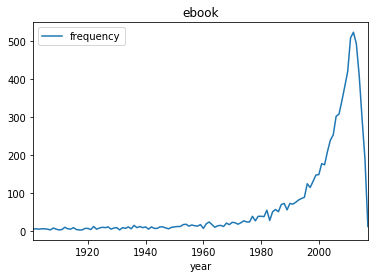

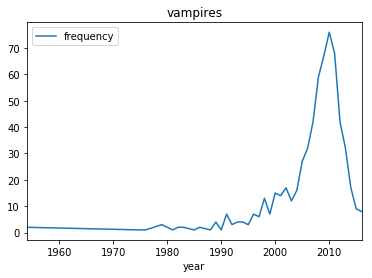

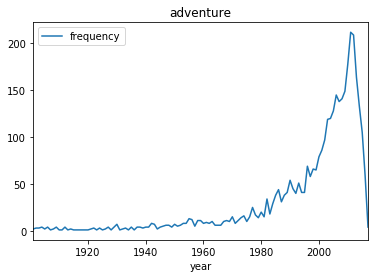

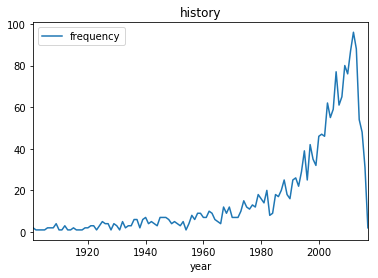

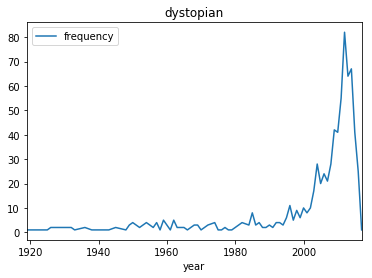

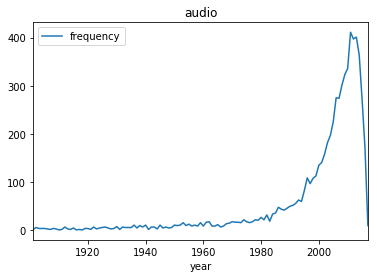

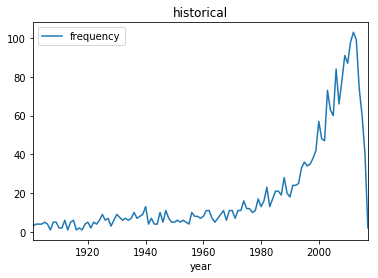

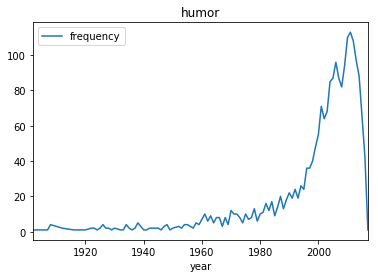

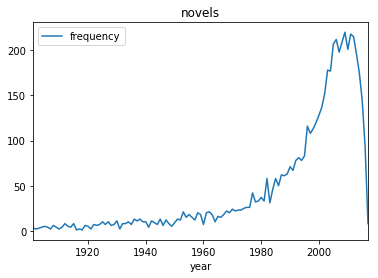

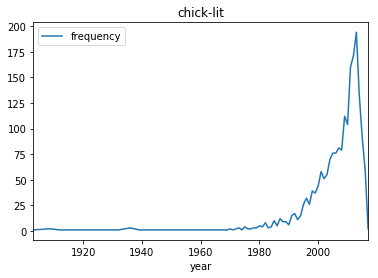

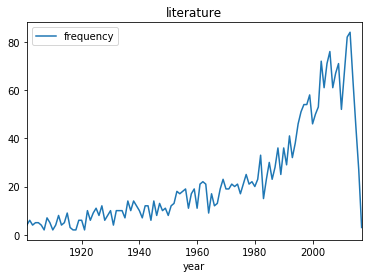

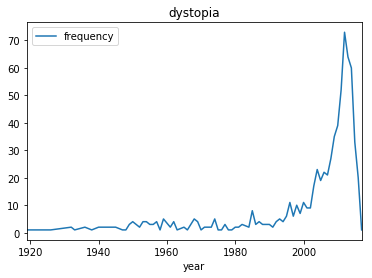

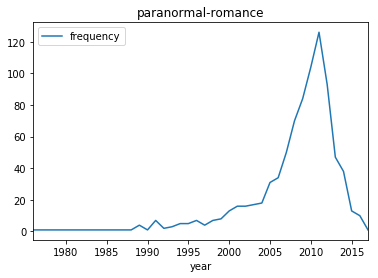

In [44]:
# Plot all genre publication volume over time
plt.figure()
for category in categories:
    _, count_plot = category_across_time(category)
    count_plot.plot('year', 'frequency').set_title(category)

In [45]:
# Paranormal romance and vampire peaked in 2010
# Classics peaked in the 80s

# look up philosophy
# might be more interesting to plot less popular ones over time

In [46]:
# Limit user-based network data to top 1000, 500, 100 books
user_network_data.head()

,book,user_id,rating
0,Harry Potter and the Half-Blood Prince,314,5
1,Harry Potter and the Half-Blood Prince,439,3
2,Harry Potter and the Half-Blood Prince,588,5
3,Harry Potter and the Half-Blood Prince,1169,4
4,Harry Potter and the Half-Blood Prince,1185,4


In [47]:
def limit_user_network(n):
    columns = ['original_title', 'title', 'original_publication_year', 'ratings_count', 'average_rating', 'small_image_url']
    top_n_books = books.sort_values('ratings_count', ascending=False).head(n)[columns]
    limited_network = user_network_data.where(user_network_data.book.isin(top_n_books.original_title)).dropna()
    return top_n_books, limited_network

limit_user_network(1000)[1].shape, limit_user_network(500)[1].shape, limit_user_network(100)[1].shape

((23022, 3), (13919, 3), (3799, 3))

In [48]:
from collections import defaultdict

def format_network(top_books, network_data):
    nodes = []
    for index, row in top_books.iterrows():
        node = {
            'title': row.original_title if not pd.isnull(row.original_title) else row.title,
            'year': row.original_publication_year if not pd.isnull(row.original_publication_year) else None,
            'ratings_count': row.ratings_count,
            'average_rating': row.average_rating,
            'img': row.small_image_url,
        }
        nodes.append(node)
    
    
    books = defaultdict(list)
    for index, row in network_data.iterrows():
        books[row.book].append(row.user_id)
    
    edges = []
    for i, b1 in enumerate(books.keys()):
        for b2 in list(books.keys())[i:]:
            if b1 != b2:
                overlap = set(books[b1]) & set(books[b2])
                if len(overlap) > 0:
                    edge = {
                        'source': b1,
                        'target': b2,
                        'overlap': [int(o) for o in overlap]
                    }
                    edges.append(edge)
    
    return {
        'nodes': nodes,
        'edges': edges,
    }


# test out with top 10 books
t, n = limit_user_network(10)
network = format_network(t, n)
network

{'edges': [{'overlap': [32635],
   'source': "Harry Potter and the Philosopher's Stone",
   'target': 'Angels & Demons '},
  {'overlap': [13794, 10246, 32305, 25182, 37855],
   'source': "Harry Potter and the Philosopher's Stone",
   'target': 'Pride and Prejudice'},
  {'overlap': [36240, 13274, 2077],
   'source': "Harry Potter and the Philosopher's Stone",
   'target': 'To Kill a Mockingbird'},
  {'overlap': [10610, 33716],
   'source': "Harry Potter and the Philosopher's Stone",
   'target': 'The Great Gatsby'},
  {'overlap': [11921, 22034, 8565],
   'source': 'Angels & Demons ',
   'target': 'Pride and Prejudice'},
  {'overlap': [4706, 28459, 22356, 12930],
   'source': 'Angels & Demons ',
   'target': 'To Kill a Mockingbird'},
  {'overlap': [41616, 1518],
   'source': 'Pride and Prejudice',
   'target': 'The Great Gatsby'},
  {'overlap': [14192, 35393, 48147],
   'source': 'Pride and Prejudice',
   'target': 'The Hobbit or There and Back Again'},
  {'overlap': [47370],
   'source'

In [49]:
import json

def save_network(n, out, indent=None):
    t, n = limit_user_network(n)
    network = format_network(t, n)
    json.dump(network, open(out, 'w'), indent=indent)
    
save_network(100, 'data/user_network_100.json', indent=4)

In [50]:
save_network(500, 'data/user_network_500.json')

In [51]:
save_network(1000, 'data/user_network_1000.json')

In [52]:
save_network(5000, 'data/user_network_5000.json')

In [53]:
save_network(10000, 'data/user_network_full.json')

In [54]:
# Create tag-based networks
tag_network_data.head()

,title,tag,tag_count
0,Harry Potter and the Half-Blood Prince,to-read,167697
1,Harry Potter and the Order of the Phoenix,to-read,24549
2,Harry Potter and the Philosopher's Stone,to-read,496107
3,Harry Potter and the Prisoner of Azkaban,to-read,11909
4,Harry Potter and the Goblet of Fire,to-read,298


In [55]:
tag_network_data.shape

(941462, 3)

In [56]:
# To prevent huge files and noisy data, filter out very common and uncommon tags
tags_uncommon_removed = tag_network_data[tag_network_data.tag_count > 500]
tag_network_data.shape, tags_uncommon_removed.shape

((941462, 3), (29290, 3))

In [57]:
tags_grouped = tags_uncommon_removed.groupby(['tag']).count()
tags_common_removed = tags_grouped[tags_grouped.tag_count < 200]

# We are left with ~400 tags
tags_common_removed.shape

(393, 2)

In [58]:
accepted_tags = tags_common_removed.index
# seems ok
accepted_tags

Index(['1001-books', '19th-century', '2014-reads', '2015-reads', '2016-reads',
       '20th-century', '5-stars', 'a-song-of-ice-and-fire', 'abandoned',
       'action',
       ...
       'ww2', 'wwii', 'ya-books', 'ya-fantasy', 'ya-fiction', 'ya-lit',
       'young-adult-fiction', 'zombie', 'zombies', 'Ｆａｖｏｒｉｔｅｓ'],
      dtype='object', name='tag', length=393)

In [59]:
# Filter out removed tags from network data
tag_network_filtered = tag_network_data.where(tag_network_data.tag.isin(accepted_tags)).dropna()

In [60]:
tag_network_data.shape, tag_network_filtered.shape

((941462, 3), (377547, 3))

In [61]:
from collections import defaultdict

book_columns = ['title', 'original_title', 'original_publication_year', 'ratings_count', 'average_rating', 'small_image_url']
sorted_books = books.sort_values('ratings_count', ascending=False)[book_columns]

# also limit by books
def create_tag_network(n):
    top_books = sorted_books.head(n)
    limited_network = tag_network_filtered.where(tag_network_filtered.title.isin(top_books.title)).dropna()
    
    nodes = []
    for index, row in top_books.iterrows():
        node = {
            'title': row.title,
            'year': row.original_publication_year if not pd.isnull(row.original_publication_year) else None,
            'ratings_count': row.ratings_count,
            'average_rating': row.average_rating,
            'img': row.small_image_url,
        }
        if not['title']:
            nodes.append(node)
    
    books = defaultdict(list)
    for index, row in limited_network.iterrows():
        books[row.title].append(row.tag)
    
    edges = []
    for i, b1 in enumerate(books.keys()):
        for b2 in list(books.keys())[i:]:
            if b1 != b2:
                overlap = set(books[b1]) & set(books[b2])

                # just show a sample of the overlap
                if len(overlap) > 0:
                    edge = {
                        'source': b1,
                        'target': b2,
                        'overlap_sample': list(overlap)[:3],
                        'overlap_size': len(overlap) 
                    }
                    edges.append(edge)
    
    return {
        'nodes': nodes,
        'edges': edges,
    }


In [62]:
top10_tag_network = create_tag_network(10)

In [63]:
top100_tag_network = create_tag_network(100)

In [64]:
top500_tag_network = create_tag_network(500)

In [65]:
top1000_tag_network = create_tag_network(1000)

In [66]:
# top5000_tag_network = create_tag_network(5000)

In [67]:
import json

json.dump(top10_tag_network, open('data/tag_network_10.json', 'w'), indent=4)

In [68]:
json.dump(top100_tag_network, open('data/tag_network_100.json', 'w'), indent=4)
json.dump(top500_tag_network, open('data/tag_network_500.json', 'w'))
json.dump(top1000_tag_network, open('data/tag_network_1000.json', 'w'))